In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### KMEANS

In [2]:
udf = pd.read_csv("C:/Users/harik/python pratice/00 - datasets-20251216T065029Z-1-001/00 - datasets/Universities.csv", index_col='Univ')
udf

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Univ,,,,,,
Brown,1310,89,22,13,22704,94
CalTech,1415,100,25,6,63575,81
CMU,1260,62,59,9,25026,72
Columbia,1310,76,24,12,31510,88
Cornell,1280,83,33,13,21864,90
Dartmouth,1340,89,23,10,32162,95
Duke,1315,90,30,12,31585,95
Georgetown,1255,74,24,12,20126,92
Harvard,1400,91,14,11,39525,97


#### Standardise  the data

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(udf)
scaled_data

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

#### Build the model

In [5]:
from sklearn.cluster import KMeans

In [6]:
model = KMeans(n_clusters=3)
model.fit(scaled_data)

C:\Users\harik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [7]:
model.labels_

array([0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0,
       0, 1, 2])

In [8]:
udf['Labels'] = model.labels_

In [9]:
udf

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Labels
Univ,,,,,,,
Brown,1310,89,22,13,22704,94,0
CalTech,1415,100,25,6,63575,81,2
CMU,1260,62,59,9,25026,72,0
Columbia,1310,76,24,12,31510,88,0
Cornell,1280,83,33,13,21864,90,0
Dartmouth,1340,89,23,10,32162,95,2
Duke,1315,90,30,12,31585,95,2
Georgetown,1255,74,24,12,20126,92,0
Harvard,1400,91,14,11,39525,97,2


In [10]:
model.inertia_

44.53176173145096

#### Hyperparameter Tuning

In [11]:
wcss = []

for i in range(1,13):
    hmodel = KMeans(n_clusters=i)
    hmodel.fit(scaled_data)
    wcss.append(hmodel.inertia_)

wcss

C:\Users\harik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\harik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\harik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\harik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

[149.99999999999997,
 64.47316262551323,
 47.47264116827912,
 38.23647611362712,
 27.230680864816932,
 24.37343710484687,
 18.884858837079378,
 16.51573203015105,
 14.123879603281159,
 11.242822617654145,
 9.847621794498162,
 7.415609155574281]

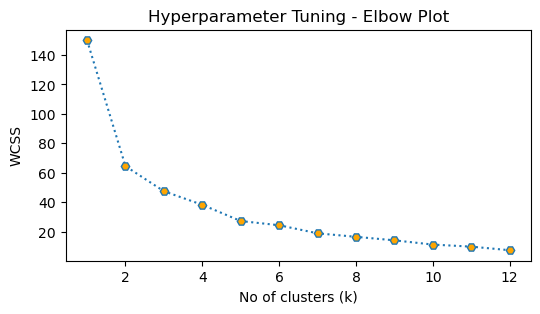

In [12]:
plt.figure(figsize=(6,3))
plt.plot(range(1,13), wcss,
         marker='H',markerfacecolor='orange',
         linestyle='dotted'
        )

plt.title('Hyperparameter Tuning - Elbow Plot')
plt.xlabel('No of clusters (k)')
plt.ylabel('WCSS')
plt.show()

#### Build final Model

In [13]:
final_model = KMeans(n_clusters=3)
final_model.fit(scaled_data)
final_model.labels_

C:\Users\harik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0,
       0, 1, 2])

In [14]:
udf['Labels'] = model.labels_

In [15]:
udf

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Labels
Univ,,,,,,,
Brown,1310,89,22,13,22704,94,0
CalTech,1415,100,25,6,63575,81,2
CMU,1260,62,59,9,25026,72,0
Columbia,1310,76,24,12,31510,88,0
Cornell,1280,83,33,13,21864,90,0
Dartmouth,1340,89,23,10,32162,95,2
Duke,1315,90,30,12,31585,95,2
Georgetown,1255,74,24,12,20126,92,0
Harvard,1400,91,14,11,39525,97,2


In [16]:
grp = udf.groupby('Labels')

for x,y in grp:
    print(y)
    print('_'*50)

               SAT  Top10  Accept  SFRatio  Expenses  GradRate  Labels
Univ                                                                  
Brown         1310     89      22       13     22704        94       0
CMU           1260     62      59        9     25026        72       0
Columbia      1310     76      24       12     31510        88       0
Cornell       1280     83      33       13     21864        90       0
Georgetown    1255     74      24       12     20126        92       0
Northwestern  1260     85      39       11     28052        89       0
NotreDame     1255     81      42       13     15122        94       0
UCBerkeley    1240     95      40       17     15140        78       0
UChicago      1290     75      50       13     38380        87       0
UMichigan     1180     65      68       16     15470        85       0
UPenn         1285     80      36       11     27553        90       0
UVA           1225     77      44       14     13349        92       0
______

In [17]:
grp.agg('mean')

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Labels,,,,,,
0,1262.500000,78.500000,40.083333,12.833333,22858.000000,87.583333
1,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
2,1362.777778,90.555556,24.333333,9.666667,41176.888889,92.222222


#### Evaluate the model

In [18]:
from sklearn.metrics import silhouette_score

In [19]:
silhouette_score(scaled_data,udf['Labels'])

0.3220757437494107

### DBSCAN

In [20]:
iris = pd.read_csv("C:/Users/harik/python pratice/00 - datasets-20251216T065029Z-1-001/00 - datasets/iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
features = iris.drop('species', axis =1)
features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Build the model

In [22]:
from sklearn.cluster import DBSCAN

In [23]:
model = DBSCAN(eps=0.5, min_samples=12, metric='euclidean')
model.fit(features)

DBSCAN(min_samples=12)

In [24]:
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
       -1,  2,  2, -1, -1, -1, -1, -1,  2,  2,  2, -1, -1,  2,  2, -1, -1,
       -1,  2, -1, -1,  1,  2, -1,  1,  1,  2, -1, -1, -1,  2,  1, -1, -1,
       -1,  2,  1,  2,  2,  2,  1,  2, -1,  2,  1,  2, -1,  1],
      dtype=int64)

In [25]:
features['labels'] = model.labels_
features.head()

,sepal_length,sepal_width,petal_length,petal_width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
grp = features.groupby('labels')
grp.agg('mean')

,sepal_length,sepal_width,petal_length,petal_width
labels,,,,
-1,6.397143,2.962857,4.891429,1.657143
0,4.973913,3.402174,1.471739,0.243478
1,5.968000,2.814000,4.424000,1.420000
2,6.600000,3.036842,5.452632,2.089474


In [27]:
iris_grp = iris.groupby('species')
iris_grp.agg('mean')

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


#### Evaluate the model

In [28]:
from sklearn.metrics import silhouette_score

In [29]:
silhouette_score(features.drop('labels', axis=1), features['labels'])

0.3286036630954711